In [10]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

Now let's start taking a closer look at our differentially expressed genes. Is there enrichment of certain function and certain pathways?

In [11]:
directory = '/home/ucsd-train48/scratch/featureCounts/'
deseq2_output = pd.read_csv(directory+"differential_expression.csv",index_col=0)
print deseq2_output.shape
deseq2_output.head()

(57820, 6)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000223972.4,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000227232.4,35.057738,1.336415,0.442222,3.022045,0.002511,0.006152
ENSG00000243485.2,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000237613.2,0.000000,NaN,NaN,NaN,NaN,NaN
ENSG00000268020.2,0.000000,NaN,NaN,NaN,NaN,NaN


In [12]:
gene_names=pd.read_csv("gencode.v19.annotation.genenames.txt",header=None,delimiter="\t",index_col=0)
gene_names.columns=["gene_name"]

In [13]:
deseq2_output_with_genes = deseq2_output.join(gene_names, how='left')
print deseq2_output_with_genes.shape
deseq2_output_with_genes.head()

(57820, 7)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
ENSG00000223972.4,0.000000,NaN,NaN,NaN,NaN,NaN,DDX11L1
ENSG00000227232.4,35.057738,1.336415,0.442222,3.022045,0.002511,0.006152,WASH7P
ENSG00000243485.2,0.000000,NaN,NaN,NaN,NaN,NaN,MIR1302-11
ENSG00000237613.2,0.000000,NaN,NaN,NaN,NaN,NaN,FAM138A
ENSG00000268020.2,0.000000,NaN,NaN,NaN,NaN,NaN,OR4G4P


In [14]:
sig_genes = deseq2_output_with_genes.loc[deseq2_output_with_genes['padj'] < 0.05]
print sig_genes.shape
sig_genes.head()

(11818, 7)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
ENSG00000227232.4,35.057738,1.336415,0.442222,3.022045,2.510734e-03,6.151664e-03,WASH7P
ENSG00000237683.5,60.047232,0.840935,0.321569,2.615102,8.920077e-03,1.996543e-02,AL627309.1
ENSG00000241860.2,28.444437,1.176778,0.474418,2.480467,1.312104e-02,2.855051e-02,RP11-34P13.13
ENSG00000225972.1,47.046931,-0.775728,0.337670,-2.297297,2.160185e-02,4.490931e-02,MTND1P23
ENSG00000237973.1,2233.870554,0.466865,0.079902,5.843000,5.126907e-09,2.066322e-08,hsa-mir-6723


In [15]:
sig_genes.to_csv(directory+'sig_diff_expr_gene.csv')

Text(0,0.5,'number of genes')

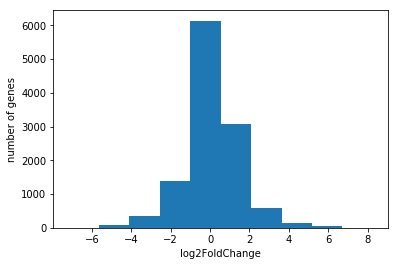

In [16]:
plt.hist(sig_genes["log2FoldChange"])
plt.xlabel("log2FoldChange")
plt.ylabel("number of genes")

In [33]:
sig_genes.sort_values(by="log2FoldChange")

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
ENSG00000204983.8,37.559086,-7.181116,1.080877,-6.643786,3.057262e-11,1.411486e-10,PRSS1
ENSG00000137975.7,845.528916,-7.083243,0.225210,-31.451698,3.979092e-217,4.859491e-215,CLCA2
ENSG00000198074.5,87.849161,-6.391324,0.560992,-11.392901,4.536331e-30,4.597434e-29,AKR1B10
ENSG00000253339.1,4.596996,-6.017266,1.560530,-3.855911,1.152996e-04,3.319661e-04,RP11-434I12.3
ENSG00000211891.4,8.555828,-5.918151,1.394294,-4.244551,2.190317e-05,6.754382e-05,IGHE
ENSG00000196176.7,3.761983,-5.728024,1.653811,-3.463529,5.331394e-04,1.428543e-03,HIST1H4A
ENSG00000250606.4,7.098137,-5.640601,1.431021,-3.941662,8.091900e-05,2.372511e-04,PRSS3P2
ENSG00000263429.3,7.097566,-5.640499,1.426037,-3.955368,7.641688e-05,2.245387e-04,LINC00675
ENSG00000250591.2,3.343763,-5.558015,1.686934,-3.294744,9.851147e-04,2.551827e-03,PRSS3P1
ENSG00000227471.4,3.343335,-5.557856,1.681774,-3.304758,9.505836e-04,2.468430e-03,AKR1B15


A fun exercise to do is to see how our results compare to the published data. Let's look at the Fold Changes that were calculated in Extended Data Table 1.

In [34]:
#gene from extended data table 1
genes=["VIM","FN1","ZEB1","ZEB2","TWIST1","TWIST2","SNAI1","SNAI2","CDH2","CDH1","CLDN4","CLDN7","TJP3","MUC1","CD133","CD44"]

In [22]:
data_table1=deseq2_output_with_genes[deseq2_output_with_genes["gene_name"].isin(genes)]

In [30]:
data_table1["FoldChange"]=data_table1["log2FoldChange"].apply(lambda x: 2**float(x))

/home/ucsd-train48/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
data_table1.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name,FoldChange
ENSG00000185499.12,4469.766647,-0.384574,0.143126,-2.686966,7.210437e-03,1.640561e-02,MUC1,0.766005
ENSG00000169554.12,0.000000,NaN,NaN,NaN,NaN,NaN,ZEB2,NaN
ENSG00000115414.14,432.896559,0.956385,0.129034,7.411906,1.244971e-13,6.558968e-13,FN1,1.940441
ENSG00000233608.2,5.686722,-0.678887,1.025142,-0.662237,5.078191e-01,6.403865e-01,TWIST2,0.624647
ENSG00000122691.8,1080.700112,2.831240,0.101300,27.948945,6.789901e-172,6.274333e-170,TWIST1,7.116858
